train 97 , test 65

# **imports and functions**

In [ ]:
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
import pandas as pd
from skimage import color
from skimage import io
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from skimage.transform import rescale, resize, downscale_local_mean 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns 
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import accuracy_score
import math

import numpy as np 
from sklearn import datasets, metrics, model_selection, svm
from PIL import Image

from sklearn.neural_network import MLPClassifier
np.random.seed(42)
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D , BatchNormalization , Dropout
from skimage.color import gray2rgb
from keras.preprocessing import image
from keras.applications import ResNet50
from sklearn.preprocessing import MinMaxScaler



In [ ]:
def drawing_conf_matrix(  y_actual , y_predict ):
    
    print( "Classification Report" )
    print ( classification_report(  y_actual , y_predict  )  )  # to represent accuacy, precision, recall and f1 score

    conf_mat = confusion_matrix( y_actual,   y_predict )   # to represent confusion matrix ( TP , FP , FN , FN )
  
    print( "Confusion Matrix")
    print( conf_mat )
    
    sns.heatmap( conf_mat , annot= True  , fmt = "" )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def readData(path):
    dataset =[]
    for imagge in glob.glob(path):

        myImage = tf.keras.utils.load_img(imagge, target_size=(128, 128))
        # convert the image pixels to a numpy array
        image = tf.keras.utils.img_to_array(myImage)
        
        
        image = image.reshape((  image.shape[0], image.shape[1], image.shape[2] ))

        from keras.applications.vgg16 import preprocess_input
        # prepare the image for the  model
        image = preprocess_input(image)

        dataset.append(image)
        
        
    return dataset

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Read Training Data**

In [ ]:
trainingDataSet = []
trainingLabels = []

data1 = readData('/content/drive/MyDrive/Currency/AUG Train/1/*.*')
data2=readData('/content/drive/MyDrive/Currency/AUG Train/2/*.*')
data3=readData('/content/drive/MyDrive/Currency/AUG Train/3/*.*')
data4=readData('/content/drive/MyDrive/Currency/AUG Train/4/*.*')
data5=readData('/content/drive/MyDrive/Currency/AUG Train/5/*.*')
data6=readData('/content/drive/MyDrive/Currency/AUG Train/6/*.*')
data7=readData('/content/drive/MyDrive/Currency/AUG Train/7/*.*')

#Training Data  



allData =[data1,data2,data3,data4,data5 , data6 ,data7]

number = 0 
for i in allData:
  for pics in i : 

    trainingDataSet.append(pics)
    trainingLabels.append(number)

  number+=1



print("{}{}".format("Length of training data is : ",len(trainingDataSet)))
print("{}{}".format("Length of labeltraining data is : ",len(trainingLabels)))


Length of training data is : 7719
Length of labeltraining data is : 7719


In [ ]:
for i in allData:
  print(len(i))

1110
1112
1059
1110
1109
1109
1110


# **Read Testing Data**

In [ ]:
testingDataSet = []
testingLabels = []


data1 = readData('/content/drive/MyDrive/Currency/AUG Test/1/*.*')
data2=readData('/content/drive/MyDrive/Currency/AUG Test/2/*.*')
data3=readData('/content/drive/MyDrive/Currency/AUG Test/3/*.*')
data4=readData('/content/drive/MyDrive/Currency/AUG Test/4/*.*')
data5=readData('/content/drive/MyDrive/Currency/AUG Test/5/*.*')
data6=readData('/content/drive/MyDrive/Currency/AUG Test/6/*.*')
data7=readData('/content/drive/MyDrive/Currency/AUG Test/7/*.*')

#Training Data  



allData =[data1,data2,data3,data4,data5 , data6 ,data7]

number = 0 
for i in allData:
  for pics in i : 

    testingDataSet.append(pics)
    testingLabels.append(number)

  number+=1



print("{}{}".format("Length of testing data is : ",len(testingDataSet)))
print("{}{}".format("Length of labeltesting data is : ",len(testingLabels)))


Length of testing data is : 880
Length of labeltesting data is : 880


In [ ]:
for i in allData :
  print(len(i))

126
125
126
126
125
126
126


In [ ]:
classesName = ["1Hundrednote" , "2Hundrednote" ,"2Thousandnote" ,"5Hundrednote","Fiftynote","Tennote","Twentynote"]

# **Training Model**

In [ ]:
nClasses = 7
# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(trainingLabels, num_classes=nClasses)
y_test_k = tensorflow.keras.utils.to_categorical(testingLabels, num_classes=nClasses)


In [ ]:
from keras.models import Sequential
resnetModel = Sequential()




pretrainedModel = tf.keras.applications.resnet50.ResNet50(
            include_top = False ,
            weights = 'imagenet',
            input_tensor = None,
            input_shape = (128,128,3),
            
          )

for layer in pretrainedModel.layers :
  layer.trainable = False 

resnetModel.add(pretrainedModel)
resnetModel.add(MaxPooling2D(pool_size = (3,3)))
resnetModel.add( Dropout(.3, noise_shape=None, seed=None))
resnetModel.add(Flatten())
resnetModel.add (BatchNormalization( ))
resnetModel.add( Dropout(.5, noise_shape=None, seed=None))
resnetModel.add (BatchNormalization( ))
resnetModel.add( Dropout(.5, noise_shape=None, seed=None))

resnetModel.add(Dense(7, activation='softmax'))

#print(resnetModel.summary())

#sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0002)

adam = tf.keras.optimizers.Adam(lr=0.0001)

resnetModel.compile(loss='categorical_crossentropy', 
                           optimizer=adam, 
                           metrics=['accuracy'])



from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
es2 = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=6)


trainingDataSet = np.array(trainingDataSet)
testingDataSet = np.array(testingDataSet)
history = resnetModel.fit(trainingDataSet, y_train_k, epochs=45, verbose=1,batch_size=100, 
                                 validation_data=(testingDataSet, y_test_k), callbacks=[es, mc,es2] )



/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/45
77/78 [============================>.] - ETA: 0s - loss: 3.0518 - accuracy: 0.1655
Epoch 1: val_accuracy improved from -inf to 0.25795, saving model to best_model.h5
78/78 [==============================] - 14s 130ms/step - loss: 3.0510 - accuracy: 0.1654 - val_loss: 1.9399 - val_accuracy: 0.2580
Epoch 2/45
77/78 [============================>.] - ETA: 0s - loss: 2.6381 - accuracy: 0.2206
Epoch 2: val_accuracy improved from 0.25795 to 0.41023, saving model to best_model.h5
78/78 [==============================] - 9s 114ms/step - loss: 2.6358 - accuracy: 0.2210 - val_loss: 1.5462 - val_accuracy: 0.4102
Epoch 3/45
77/78 [============================>.] - ETA: 0s - loss: 2.3445 - accuracy: 0.2690
Epoch 3: val_accuracy improved from 0.41023 to 0.52841, saving model to best_model.h5
78/78 [==============================] - 9s 115ms/step - loss: 2.3450 - accuracy: 0.2691 - val_loss: 1.3472 - val_accuracy: 0.5284
Epoch 4/45
77/78 [============================>.] - ETA: 0s - loss: 2

In [ ]:
testingPrediction =  resnetModel.predict(testingDataSet)
trainingPrediction = resnetModel.predict(trainingDataSet)

242/242 [==============================] - 9s 36ms/step


In [ ]:

testingPrediction = testingPrediction.argmax(axis=-1)
trainingPrediction = trainingPrediction.argmax(axis = -1 )

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1110
           1       0.99      0.98      0.99      1112
           2       0.99      1.00      0.99      1059
           3       0.99      1.00      1.00      1110
           4       0.96      0.97      0.96      1109
           5       0.98      0.98      0.98      1109
           6       0.99      0.99      0.99      1110

    accuracy                           0.98      7719
   macro avg       0.98      0.98      0.98      7719
weighted avg       0.98      0.98      0.98      7719

Confusion Matrix
[[1074    0    2    0   33    1    0]
 [   2 1095    5    3    5    2    0]
 [   0    3 1056    0    0    0    0]
 [   0    0    1 1108    0    1    0]
 [   9    6    1    2 1076   13    2]
 [   3    3    3    1    3 1085   11]
 [   0    2    0    0    9    2 1097]]


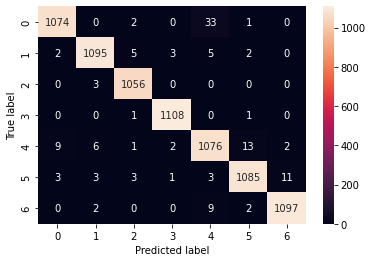

In [ ]:
drawing_conf_matrix(   trainingLabels, trainingPrediction  )

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.94      0.86       126
           1       0.82      0.85      0.83       125
           2       1.00      0.90      0.95       126
           3       0.95      0.73      0.83       126
           4       0.74      0.86      0.79       125
           5       0.90      0.77      0.83       126
           6       0.79      0.86      0.82       126

    accuracy                           0.84       880
   macro avg       0.85      0.84      0.84       880
weighted avg       0.85      0.84      0.84       880

Confusion Matrix
[[119   0   0   0   7   0   0]
 [  1 106   0   2   6   2   8]
 [  4   2 113   2   1   0   4]
 [  5   1   0  92  12   5  11]
 [ 17   0   0   0 107   0   1]
 [  6   6   0   1  12  97   4]
 [  0  14   0   0   0   4 108]]


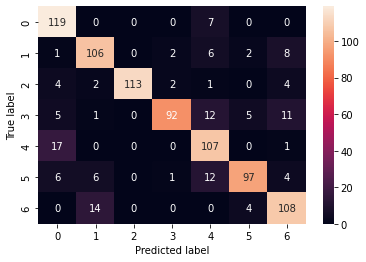

In [ ]:
drawing_conf_matrix(   testingLabels, testingPrediction  )

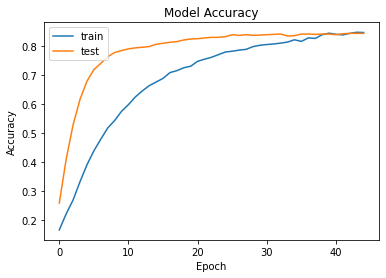

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


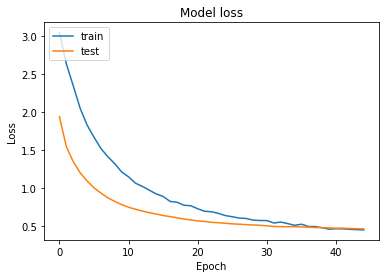

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# real time , pretrained model

In [ ]:
imagess=[]
def readImageData (path):
    dataset =[]
    for imagge in glob.glob(path):

        myImage = tf.keras.utils.load_img(imagge, target_size=(128, 128))
        imagess.append(myImage)
        # convert the image pixels to a numpy array
        image = tf.keras.utils.img_to_array(myImage)
        
        
        image = image.reshape((  image.shape[0], image.shape[1], image.shape[2] ))

    
        # prepare the image for the model
        image = preprocess_input(image)

        dataset.append(image)
        
        
    return dataset


from keras.preprocessing import image

outData = readImageData("/content/drive/MyDrive/New folder/*.*")

print(len(outData))

8


In [ ]:
outData = np.array(outData)

myPrediction = resnetModel.predict(outData) 

myPrediction = myPrediction.argmax(axis=-1)
print(myPrediction)
y = np.array(classesName)[myPrediction]
y

1/1 [==============================] - 0s 24ms/step
[0 2 2 4 6 3 0 4]


array(['1Hundrednote', '2Thousandnote', '2Thousandnote', 'Fiftynote',
       'Twentynote', '5Hundrednote', '1Hundrednote', 'Fiftynote'],
      dtype='<U13')

1Hundrednote


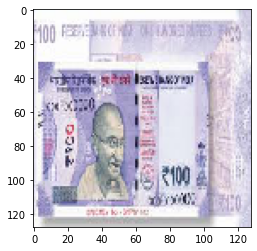

In [ ]:
plt.imshow(imagess[0])
print(y[0])

2Thousandnote


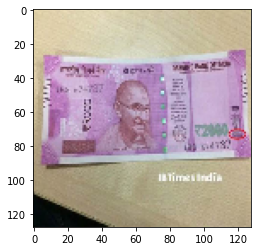

In [ ]:
plt.imshow(imagess[1])
print(y[1])

2Thousandnote


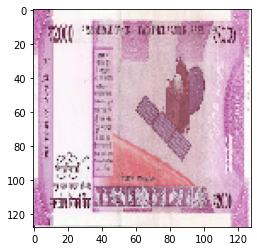

In [ ]:
plt.imshow(imagess[2])
print(y[2])

Fiftynote


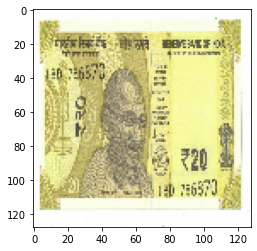

In [ ]:
plt.imshow(imagess[3])
print(y[3])

Twentynote


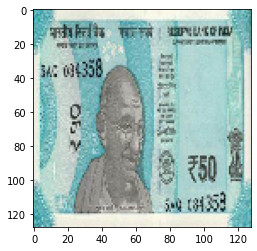

In [ ]:
plt.imshow(imagess[4])
print(y[4])

5Hundrednote


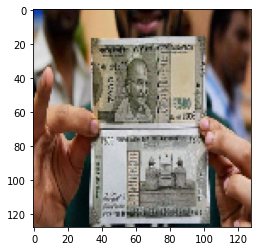

In [ ]:
plt.imshow(imagess[5])
print(y[5])

1Hundrednote


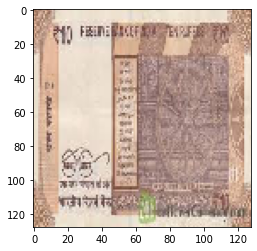

In [ ]:
plt.imshow(imagess[6])
print(y[6])

Fiftynote


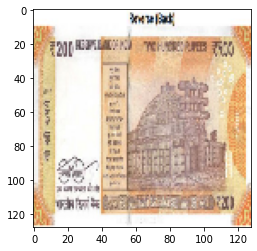

In [ ]:
plt.imshow(imagess[7])
print(y[7])